In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Notebook to investigate the performance of spike interface in localizing neurons 

In [2]:
import MEArec as mr # what we will use to create a synthetic recording
import spikeinterface.full as si  # what we will use to sort the spikes

import warnings
from probeinterface.plotting import plot_probe
from matplotlib import cm
from probeinterface import read_prb

import time
import numpy as np

job_kwargs = {'n_jobs' : -1, 'chunk_memory' : '10M', 'verbose': True, 'progress_bar': True}

In [3]:
rec = mr.load_recordings('recordings.h5')
positions = np.hstack((rec.template_locations[:, 1:3], rec.template_locations[:, 0][:, np.newaxis]))

from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_comparison_positions
recording, gt_sorting = si.read_mearec('recordings.h5')
recording_f = si.bandpass_filter(recording)
recording_f = si.common_reference(recording_f)
recording_f = si.zscore(recording_f)

In [6]:
benchmarks = []
waveforms = None
for method in ['center_of_mass', 'monopolar_triangulation', 'grid_convolution']:
    if method == 'center_of_mass':
        for feature in ['ptp', 'energy', 'peak_voltage']:
            title = f'CoM ({feature})'
            params = {'feature' : feature}
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms
            bench.run(method, params)
            waveforms = bench.waveforms
            benchmarks.append(bench)
    elif method == 'monopolar_triangulation':
        for feature in ['ptp', 'energy', 'peak_voltage']:
            title = f'Monopolar ({feature})'
            params = {'enforce_decrease': True, 'feature' : feature}
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms
            bench.run(method, params)
            waveforms = bench.waveforms
            benchmarks.append(bench)
    elif method == 'grid_convolution':
        title = 'Grid'
        params = {}
        bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
        if waveforms is not None:
            bench.waveforms = waveforms
        bench.run(method, params)
        waveforms = bench.waveforms
        benchmarks.append(bench)
    
    

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer:   0%|          | 0/10 [00:00<?, ?it/s]

/media/cure/Secondary/pierre/softwares/spikeinterface/src/spikeinterface/sortingcomponents/tools.py:70: RuntimeWarning: invalid value encountered in divide
  prototype = np.nanmedian(waveforms[:, :, 0] / (np.abs(waveforms[:, nbefore, 0][:, np.newaxis])), axis=0)


extract waveforms shared_memory mono buffer:   0%|          | 0/10 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

GridSpec(4, 3)


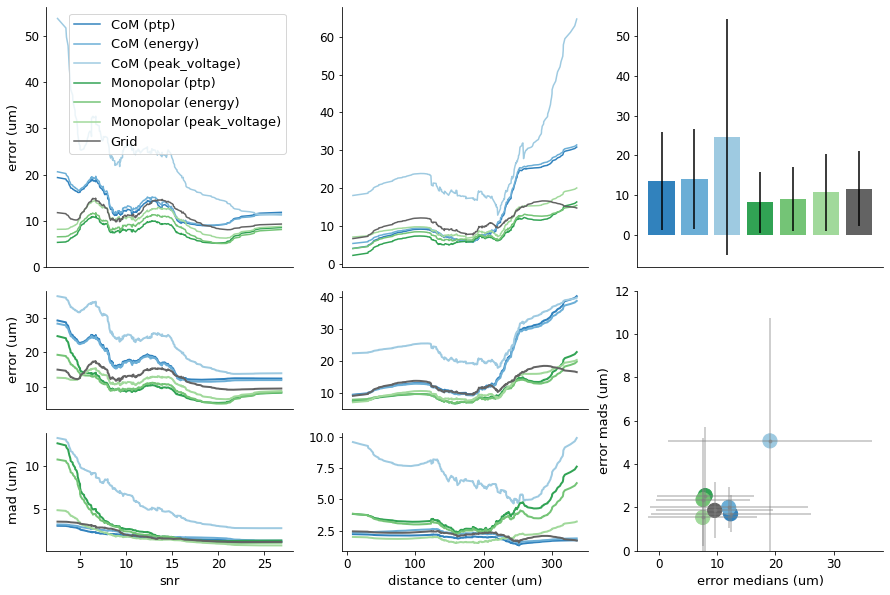

In [7]:
colors = {}

import matplotlib as mpl

cmap = mpl.cm.tab20c
norm = mpl.colors.Normalize(vmin=0, vmax=1)

for value, bench in zip([0,0.05,0.1, 0.4,0.45,0.5, 0.8], benchmarks):    
    colors[bench.title] = mpl.cm.ScalarMappable(norm=norm, cmap=cmap).to_rgba(value)
    
plot_comparison_positions(benchmarks, colors=colors)
import pylab as plt
plt.savefig('comparison.pdf')

ZScoreRecording: 256 channels - 32.0kHz - 1 segments - 320,000 samples - 10.00s - float32 dtype 
                 312.50 MiB
extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

ZScoreRecording: 256 channels - 32.0kHz - 1 segments - 320,000 samples - 10.00s - float32 dtype 
                 312.50 MiB


/media/cure/Secondary/pierre/softwares/spikeinterface/src/spikeinterface/widgets/widget_list.py:146: UserWarning: plot_timeseries() is now plot_traces()
  warnings.warn("plot_timeseries() is now plot_traces()")
/media/cure/Secondary/pierre/softwares/spikeinterface/src/spikeinterface/sortingcomponents/benchmark/benchmark_peak_localization.py:557: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0, 2].scatter(benchmark_1.template_positions[cell_ind, 0], benchmark_1.template_positions[cell_ind, 1], c=colors[benchmark_1.title], s=100)


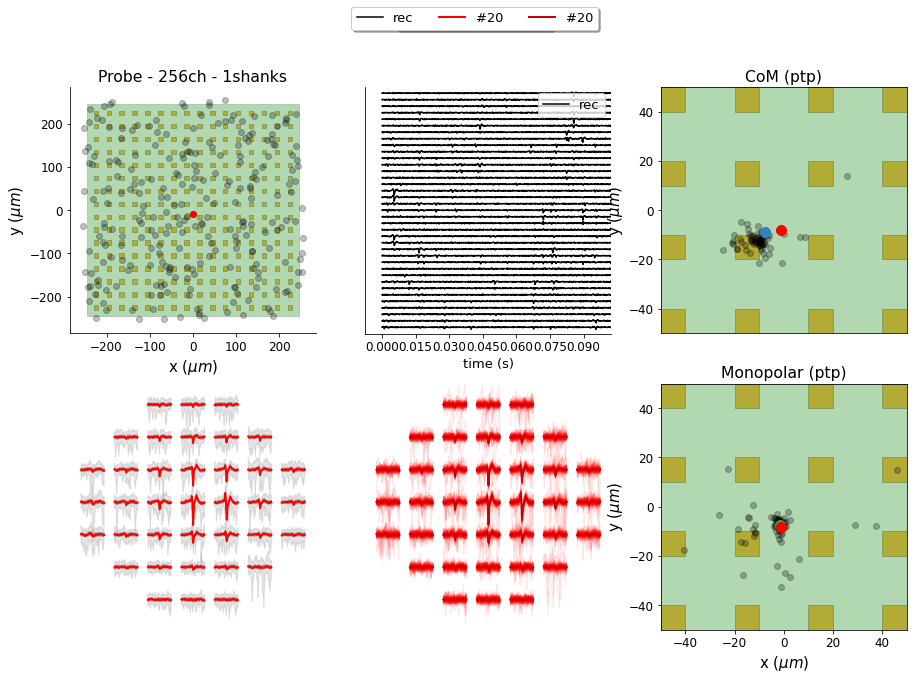

In [6]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_figure_1
plot_figure_1(benchmarks, colors=colors)
plt.savefig('illustration.pdf')

In [7]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import plot_comparison_precision

In [8]:
benchmarks_ms = {}
waveforms = None
xaxis = [0.25, 0.5, 0.75, 1, 1.25, 1.5]
benchmarks_ms['xaxis'] = xaxis

for method in ['monopolar_triangulation', 'center_of_mass', 'grid_convolution']:
    for t_range in xaxis:
        if method == 'monopolar_triangulation':
            for feature in ['ptp', 'energy', 'peak_voltage']:
                title = f'Monopolar ({feature})'
                params = {'enforce_decrease': True, 'ms_before' : t_range, 'ms_after' : t_range, 'feature' : feature}
                bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
                if waveforms is not None:
                    bench.waveforms = waveforms    
                bench.run(method, params)
                waveforms = bench.waveforms
                if title in benchmarks_ms:
                    benchmarks_ms[title] += [bench]
                else:
                    benchmarks_ms[title] = [bench]
        elif method == 'center_of_mass':
            for feature in ['ptp', 'energy', 'peak_voltage']:
                params = {'ms_before' : t_range, 'ms_after' : t_range, 'feature' : feature}
                title = f'CoM ({feature})'
                bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
                if waveforms is not None:
                    bench.waveforms = waveforms    
                bench.run(method, params)
                waveforms = bench.waveforms
                if title in benchmarks_ms:
                    benchmarks_ms[title] += [bench]
                else:
                    benchmarks_ms[title] = [bench]
        elif method == 'grid_convolution':
            params = {'ms_before' : t_range, 'ms_after' : t_range}
            title = f'Grid'
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms    
            bench.run(method, params)
            waveforms = bench.waveforms
            if title in benchmarks_ms:
                benchmarks_ms[title] += [bench]
            else:
                benchmarks_ms[title] = [bench]



extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms memmap multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

/media/cure/Secondary/pierre/softwares/spikeinterface/src/spikeinterface/sortingcomponents/tools.py:70: RuntimeWarning: invalid value encountered in divide
  prototype = np.nanmedian(waveforms[:, :, 0] / (np.abs(waveforms[:, nbefore, 0][:, np.newaxis])), axis=0)


localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

In [9]:
benchmarks_radius = {}
waveforms = None
xaxis = [25, 50, 75, 100, 125, 150]
benchmarks_radius['xaxis'] = xaxis 

for method in ['monopolar_triangulation', 'center_of_mass', 'grid_convolution']:
    for r_range in xaxis:
        if method == 'monopolar_triangulation':
            for feature in ['ptp', 'energy', 'peak_voltage']:
                title = f'Monopolar ({feature})'
                params = {'enforce_decrease': True, 'radius_um' : r_range, 'feature' : feature}
                bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
                if waveforms is not None:
                    bench.waveforms = waveforms    
                bench.run(method, params)
                waveforms = bench.waveforms
                if title in benchmarks_radius:
                    benchmarks_radius[title] += [bench]
                else:
                    benchmarks_radius[title] = [bench]
        elif method == 'center_of_mass':
            for feature in ['ptp', 'energy', 'peak_voltage']:
                params = {'radius_um' : r_range, 'feature' : feature}
                title = f'CoM ({feature})'
                bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
                if waveforms is not None:
                    bench.waveforms = waveforms    
                bench.run(method, params)
                waveforms = bench.waveforms
                if title in benchmarks_radius:
                    benchmarks_radius[title] += [bench]
                else:
                    benchmarks_radius[title] = [bench]
        elif method == 'grid_convolution':
            params = {'radius_um' : r_range}
            title = f'Grid'
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms    
            bench.run(method, params)
            waveforms = bench.waveforms
            if title in benchmarks_radius:
                benchmarks_radius[title] += [bench]
            else:
                benchmarks_radius[title] = [bench]
    

[autoreload of spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization failed: Traceback (most recent call last):
  File "/home/cure/anaconda3/envs/circus/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/cure/anaconda3/envs/circus/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/cure/anaconda3/envs/circus/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/media/cure/Secondary/pierre/softwares/s

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms memmap multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

/media/cure/Secondary/pierre/softwares/spikeinterface/src/spikeinterface/sortingcomponents/benchmark/benchmark_peak_localization.py:83: RuntimeWarning: All-NaN slice encountered
  self.medians_over_templates = np.array([np.nanmedian(self.raw_templates_results[unit_id]) for unit_id in  self.waveforms.sorting.unit_ids])
/media/cure/Secondary/pierre/softwares/spikeinterface/src/spikeinterface/sortingcomponents/benchmark/benchmark_peak_localization.py:84: RuntimeWarning: All-NaN slice encountered
  self.mads_over_templates = np.array([np.nanmedian(np.abs(self.raw_templates_results[unit_id] - np.nanmedian(self.raw_templates_results[unit_id]))) for unit_id in  self.waveforms.sorting.unit_ids])


extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

/media/cure/Secondary/pierre/softwares/spikeinterface/src/spikeinterface/sortingcomponents/benchmark/benchmark_peak_localization.py:83: RuntimeWarning: All-NaN slice encountered
  self.medians_over_templates = np.array([np.nanmedian(self.raw_templates_results[unit_id]) for unit_id in  self.waveforms.sorting.unit_ids])
/media/cure/Secondary/pierre/softwares/spikeinterface/src/spikeinterface/sortingcomponents/benchmark/benchmark_peak_localization.py:84: RuntimeWarning: All-NaN slice encountered
  self.mads_over_templates = np.array([np.nanmedian(np.abs(self.raw_templates_results[unit_id] - np.nanmedian(self.raw_templates_results[unit_id]))) for unit_id in  self.waveforms.sorting.unit_ids])


extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

/media/cure/Secondary/pierre/softwares/spikeinterface/src/spikeinterface/sortingcomponents/benchmark/benchmark_peak_localization.py:83: RuntimeWarning: All-NaN slice encountered
  self.medians_over_templates = np.array([np.nanmedian(self.raw_templates_results[unit_id]) for unit_id in  self.waveforms.sorting.unit_ids])
/media/cure/Secondary/pierre/softwares/spikeinterface/src/spikeinterface/sortingcomponents/benchmark/benchmark_peak_localization.py:84: RuntimeWarning: All-NaN slice encountered
  self.mads_over_templates = np.array([np.nanmedian(np.abs(self.raw_templates_results[unit_id] - np.nanmedian(self.raw_templates_results[unit_id]))) for unit_id in  self.waveforms.sorting.unit_ids])


extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

/media/cure/Secondary/pierre/softwares/spikeinterface/src/spikeinterface/sortingcomponents/benchmark/benchmark_peak_localization.py:83: RuntimeWarning: All-NaN slice encountered
  self.medians_over_templates = np.array([np.nanmedian(self.raw_templates_results[unit_id]) for unit_id in  self.waveforms.sorting.unit_ids])
/media/cure/Secondary/pierre/softwares/spikeinterface/src/spikeinterface/sortingcomponents/benchmark/benchmark_peak_localization.py:84: RuntimeWarning: All-NaN slice encountered
  self.mads_over_templates = np.array([np.nanmedian(np.abs(self.raw_templates_results[unit_id] - np.nanmedian(self.raw_templates_results[unit_id]))) for unit_id in  self.waveforms.sorting.unit_ids])


In [10]:
recordings = {}

xaxis = [100, 300, 500, 700, 900]

for cut_off in xaxis :
    recordings[cut_off] = si.bandpass_filter(recording, freq_min=cut_off)
    recordings[cut_off] = si.common_reference(recordings[cut_off])
    recordings[cut_off] = si.zscore(recordings[cut_off])

In [11]:
benchmarks_cutoff = {}

benchmarks_cutoff['xaxis'] = xaxis 

for cut_off in xaxis:
    waveforms = None
    for method in ['monopolar_triangulation', 'center_of_mass', 'grid_convolution']:
    
        if method == 'monopolar_triangulation':
            for feature in ['ptp', 'energy', 'peak_voltage']:
                title = f'Monopolar ({feature})'
                params = {'enforce_decrease': True, 'feature' : feature}
                bench = BenchmarkPeakLocalization(recordings[cut_off], gt_sorting, positions, job_kwargs=job_kwargs, title=title)
                if waveforms is not None:
                    bench.waveforms = waveforms    
                bench.run(method, params)
                waveforms = bench.waveforms
                if title in benchmarks_cutoff:
                    benchmarks_cutoff[title] += [bench]
                else:
                    benchmarks_cutoff[title] = [bench]
        elif method == 'center_of_mass':
            for feature in ['ptp', 'energy', 'peak_voltage']:
                title = f'CoM ({feature})'
                params = {'feature' : feature}
                bench = BenchmarkPeakLocalization(recordings[cut_off], gt_sorting, positions, job_kwargs=job_kwargs, title=title)
                if waveforms is not None:
                    bench.waveforms = waveforms    
                bench.run(method, params)
                waveforms = bench.waveforms
                if title in benchmarks_cutoff:
                    benchmarks_cutoff[title] += [bench]
                else:
                    benchmarks_cutoff[title] = [bench]
        elif method == 'grid_convolution':
            title = f'Grid'
            params = {}
            bench = BenchmarkPeakLocalization(recordings[cut_off], gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms    
            bench.run(method, params)
            waveforms = bench.waveforms
            if title in benchmarks_cutoff:
                benchmarks_cutoff[title] += [bench]
            else:
                benchmarks_cutoff[title] = [bench]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms memmap multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms memmap multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms memmap multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms memmap multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap multi buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms memmap multi buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 72 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 72 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory mono buffer:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 72 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

In [12]:
from spikeinterface.sortingcomponents.benchmark.benchmark_tools import BenchmarkBase, _simpleaxis 
import pylab as plt
import matplotlib

def plot_comparison_precision_2(benchmarks, colors=None):

    import pylab as plt
    fig, axes = plt.subplots(nrows=3, ncols=len(benchmarks) + 1, figsize=(15, 7), squeeze=False)
    
    to_explore = list(benchmarks_ms.keys())
    to_explore.remove('xaxis')
    
    for title in to_explore:
        
        
        if title.find('Monopolar') > -1:
            jcount = 1
        elif title.find('CoM') > -1:
            jcount = 0
        elif title.find('Grid') > -1:
            jcount = 2
    
        for icount, benchmark in enumerate(benchmarks):

            bench = benchmark[title]
            
            #vrange = np.array(list(bench.keys()))
            #v_min = np.min(vrange)
            #v_max = np.max(vrange)

            #my_cmap = plt.get_cmap(cmaps[jcount])
            #cNorm  = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)
            #scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=my_cmap)

            if icount == len(benchmarks) - 1:
                b = bench[0]

                spikes = b.spike_positions[0]
                units = b.waveforms.sorting.unit_ids
                all_x = np.concatenate([spikes[unit_id]['x'] for unit_id in units])
                all_y = np.concatenate([spikes[unit_id]['y'] for unit_id in units])
                try:
                    all_z = np.concatenate([spikes[unit_id]['z'] for unit_id in units])
                except Exception:
                    all_z = np.nan * np.zeros(len(all_x))

                gt_positions = b.gt_positions
                real_x = np.concatenate([gt_positions[c, 0]*np.ones(len(spikes[i]['x'])) for c, i in enumerate(units)])
                real_y = np.concatenate([gt_positions[c, 1]*np.ones(len(spikes[i]['y'])) for c, i in enumerate(units)])
                try:
                    real_z = np.concatenate([gt_positions[c, 2]*np.ones(len(spikes[i]['z'])) for c, i in enumerate(units)])
                except Exception:
                    real_z = np.nan * np.zeros(len(real_x))

                dx = np.corrcoef(np.nan_to_num(all_x), real_x)[0, 1]
                dy = np.corrcoef(np.nan_to_num(all_y), real_y)[0, 1]
                dz = np.corrcoef(np.nan_to_num(all_z), real_z)[0, 1]
                ax = axes[jcount, icount+1]
                
                #x_means = np.array([np.nanmean(dx), np.nanmean(dy), np.nanmean(dz)])
                #y_means = np.array([np.nanstd(dx), np.nanstd(dy), np.nanstd(dz)])
                x_means = np.array([dx, dy, dz])
                
                ax.plot(np.arange(3), x_means, c=colors[title], lw=2)
                #ax.fill_between(np.arange(len(x_means)), x_means-y_means,x_means+y_means,
                #            color=colors[title], alpha=0.05)
                _simpleaxis(ax)
                
                ax.set_ylabel('corrcoef')
                #if jcount == 0:
                ax.set_xticks(np.arange(3), ['x', 'y', 'z'])
               # ax.set_ylim(0, 45)
            
            ax = axes[jcount, icount]
            
            _simpleaxis(ax)

            x_means = []
            y_means = []
            y_stds = []
            labels = []
            
            for b in bench:
                x_means += [np.nanmean(b.medians_over_templates)]
                #x_stds += [np.std(b.medians_over_templates)]
                y_means += [np.nanmean(b.mads_over_templates)]
                #y_stds += [np.std(b.mads_over_templates)]
                #colors += [scalarMap.to_rgba(key)]
                #label = b.title.replace('Mononopolar', '')
                #label = label.replace('CoM (ptp)', '')
                #label = label.replace('Grid', '')
                #label = label.replace('[', '')
                #label = label.replace(']', '')
                #labels += [label]
                #title = b.title
            xaxis = benchmark['xaxis']
                #ax.scatter(x_means, y_means, c=colors, label=label, s=200, edgecolor='k')
            
            x_means = np.array(x_means)
            y_means = np.array(y_means)
            ax.plot(xaxis, x_means, color=colors[title], lw=2, label=title)
            ax.fill_between(xaxis, x_means-y_means,x_means+y_means,
                            color=colors[title], alpha=0.05)
                
            #ax.errorbar(x_means, y_means, xerr=x_stds, yerr=y_stds, fmt='.', c='0.5', alpha=0.5)
                
    
            #ax.legend(loc='lower right')
            
            if icount == 0:
                ax.set_ylabel('error medians (um)')
            else:
                ax.set_yticks([])
            
            if jcount == 2:
                if icount == 0:
                    ax.set_xlabel('Time (ms)')
                elif icount == 1:
                    ax.set_xlabel('Radius (um)')
                elif icount == 2:
                    ax.set_xlabel('Cutoff (Hz)')
            else:
                ax.set_xticks([])
                #ax.set_xlim(7, 9)
            #    ax.set_xticks([])
            #else:
            #    ax.set_xticks(np.arange(len(labels)), labels, rotation=45)
                #ax.set_xlim(12, 14)
            
            #ymin, ymax = ax.get_ylim()
            
            ax.set_ylim(5, 35)
            #else:
            #    ax.set_ylim(0, 2)
                #ax.set_xlim(5, 20)
            
            #ax.set_title(method)
        axes[jcount, 0].legend()

/home/cure/anaconda3/envs/circus/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/cure/anaconda3/envs/circus/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/cure/anaconda3/envs/circus/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/cure/anaconda3/envs/circus/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/cure/anaconda3/envs/circus/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/cure/anaconda3/envs/circus/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c

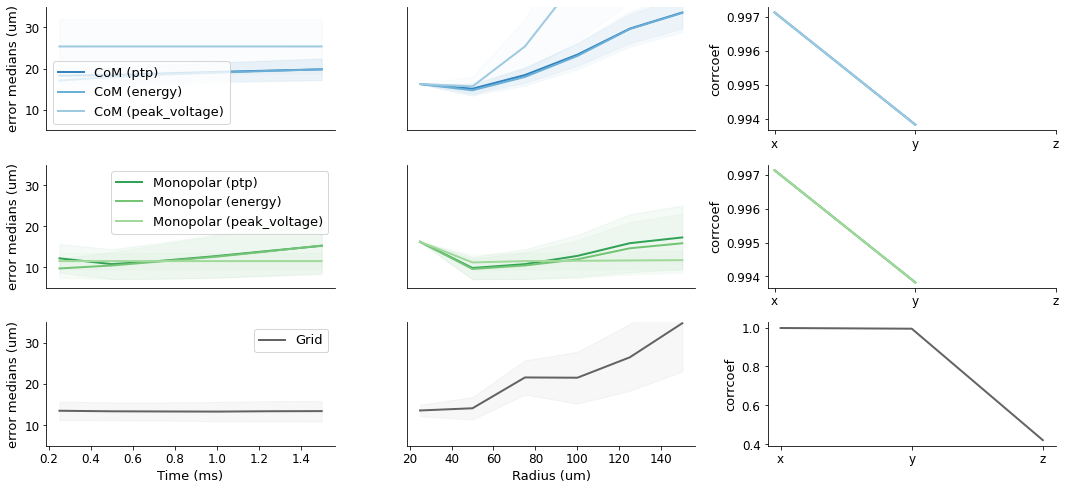

In [13]:
plot_comparison_precision_2([benchmarks_ms, benchmarks_radius], colors=colors)
plt.tight_layout()
plt.savefig('influence.pdf')

In [ ]:
benchmarks_cutoff['Monopolar (peak_voltage)'] = benchmarks_cutoff.pop('Mononopolar (peak_voltage)')

In [ ]:
benchmarks_cutoff.keys()

In [ ]:
tmp[0]